<a href="https://colab.research.google.com/github/chabann/econometric/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2_%D0%AD%D0%BA%D0%BE%D0%BD%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импортируем необходимые пакеты и задаем имеющиеся данные

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

X_data = [199.49, 234.15, 242.79, 253.23, 256.9, 235.45, 304.74, 273.29, 384.7, 
     440.27, 448.57, 322.65, 533.07, 563.24, 550.44, 530.46, 636.86, 626.61, 
     647.75, 636.04]
Y_data = [310.26, 400.1, 220.43, 373.35, 340.47, 349.5, 353.11, 343.51, 401.62, 
     408.31, 405.25, 417.52, 515.34, 510.77, 519.34, 498.03, 461.52, 642.07, 
     488.62, 638.97]

n = len(X_data)

Отсортируем совместно X и Y

In [2]:
x, y = zip(*sorted(zip(X_data, Y_data)))

x = np.array(x)
y = np.array(y)

Функция для нахождения параметров с помощью МНК

In [3]:
def mnk_coeff(x, y):
  n = len(x)

  x_line = sum(x) / n
  y_line = sum(y) / n
  xy_line = sum([x[i] * y[i]  / n for i in range(n)])
  x_2_line = sum([(xi ** 2)  / n for xi in x])

  b = (xy_line - x_line * y_line) / (x_2_line - x_line * x_line)
  a = y_line - b * x_line

  return a, b

Вызовем функцию и найдем коэффициенты

In [4]:
a, b = mnk_coeff(x, y)

print('Параметры a и b найденные с помощью МНК')
print(f'a: {a}')
print(f'b: {b}')
print('')


Параметры a и b найденные с помощью МНК
a: 196.91995501930023
b: 0.5600118859728144



Функция для нахождение вычисленных значений y

In [5]:
def lin_regression(x, a, b):
  y_pr = [a + b * xi for xi in x]

  return y_pr

In [6]:
y_pr = lin_regression(x, a, b)

print('y по уравнению линейной регрессии')
print(f'y_pr: {y_pr}')
print('')

y по уравнению линейной регрессии
y_pr: [308.636726152017, 328.0467381198347, 328.7747535715994, 332.8852408146398, 338.731764904196, 340.78700852571626, 349.96560333681066, 367.57797715065567, 377.6077900284288, 412.35652755304193, 443.4763880565512, 448.12448671012555, 493.98386005243935, 495.4454910748284, 505.17289753417623, 512.3410496746283, 547.8290028887254, 553.1099149734491, 553.5691247199468, 559.6676541581908]



Находим остатки - разницы между фактическими значениями показателя и вычисленными по уравнению линейной регрессии

In [7]:
e = [y[i] - y_pr[i] for i in range(n)]
print(f'e: {e}')

e: [1.6232738479830005, 72.05326188016534, 20.725246428400624, -112.45524081463981, 34.61823509580404, -0.3170085257162327, -6.455603336810668, -14.467977150655656, 39.9122099715712, -10.736527553041924, -35.16638805655117, -42.87448671012555, 4.046139947560619, 19.894508925171635, 14.167102465823803, -1.5710496746282843, 94.24099711127462, 85.8600850265509, -92.0491247199468, -71.04765415819077]


Построим график зависимости остатков от фактора x

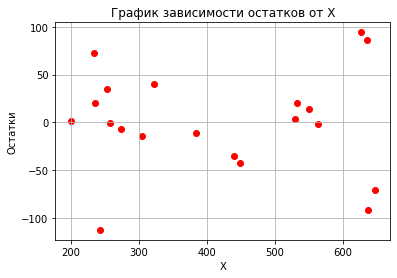

In [8]:
plt.title("График зависимости остатков от X")
plt.scatter(x, y - y_pr, color="red", linewidths=1)
plt.xlabel("X")
plt.ylabel("Остатки")
plt.grid()
plt.show()

Проверим гипотезу о наличии гетероскесдастичности в линейной регрессии с помощью теста Гольдфельда-Квандта на уровне значимости 0,05

In [9]:
m = 6
m_ind = int((n-m) / 2)

print(f'm_ind: {m_ind}')
print('')

x1 = x[:m_ind]
y1 = y[:m_ind]

x2 = x[-m_ind :]
y2 = y[-m_ind :]

a1, b1 = mnk_coeff(x1, y1)
y_pr1 = lin_regression(x1, a1, b1)

print('Параметры a1, b1 и вычисленные значения y:')
print(f'a1: {a1}')
print(f'b1: {b1}')
print(f'y_pr1: {y_pr1}')
print('')


a2, b2 = mnk_coeff(x2, y2)
y_pr2 = lin_regression(x2, a2, b2)

print('Параметры a2, b2 и вычисленные значения y:')
print(f'a2: {a2}')
print(f'b2: {b2}')
print(f'y_pr2: {y_pr2}')
print('')



m_ind: 7

Параметры a1, b1 и вычисленные значения y:
a1: 249.08494479691097
b1: 0.3503954382242811
y_pr1: [318.98533076827283, 331.1300366571264, 331.5855507268179, 334.15745324338417, 337.81558161844566, 339.1015328767288, 344.84451410922475]

Параметры a2, b2 и вычисленные значения y:
a2: 338.07249450269177
b2: 0.3362229795544496
y_pr2: [517.3028782137822, 523.143071368643, 527.44672550694, 548.7531757213054, 551.9237584185039, 552.1994612617385, 555.8609295090864]



Вычислим остаточные суммы квадратов по каждой из выборок

In [10]:
S1_2 = sum([(y1[i] - y_pr1[i]) ** 2 for i in range(m_ind)])

print(f'S1^2 {S1_2}')
print('')

S2_2 = sum([(y2[i] - y_pr2[i]) ** 2 for i in range(m_ind)])

print(f'S2^2 {S2_2}')
print('')

S1^2 19354.196874411184

S2^2 29325.614579240984



Вычислим статистику F

In [11]:
F = S2_2 / S1_2

print(f'F = {F}')

F = 1.5152069997806696


In [12]:
F_tabl = stats.f.interval(1 - 0.05, m_ind - 2, m_ind - 2)[1]

print(f'F_tabl = {F_tabl}')

if F <= F_tabl:
  print('Гипотеза гомоскедастичности принимается на уровне значимости 0,05' )
else:
  print('Гипотеза гомоскедастичности не принимается на уровне значимости 0,05' )

F_tabl = 7.146381828732832
Гипотеза гомоскедастичности принимается на уровне значимости 0,05


In [13]:
F_tabl = stats.f.interval(1 - 0.01, m_ind - 2, m_ind - 2)[1]

print(f'F_tabl = {F_tabl}')

if F <= F_tabl:
  print('Гипотеза гомоскедастичности принимается на уровне значимости 0,01' )
else:
  print('Гипотеза гомоскедастичности не принимается на уровне значимости 0,01' )

F_tabl = 14.939605459912224
Гипотеза гомоскедастичности принимается на уровне значимости 0,01
